# Starbucks Capstone Challenge 
## Evaluate model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sns.set_theme(style='darkgrid')

In [2]:
# load model 
model = pd.read_pickle('../data/models/classifier.pkl')

# load test data
X_test = pd.read_pickle('../data/processed/X_test.pkl')

y_test = pd.read_pickle('../data/processed/y_test.pkl')

### 5. Evaluate model

In [3]:
y_pred = model.predict(X_test)

In [4]:
print(accuracy_score(y_test, y_pred))

0.936495791889824


In [5]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [6]:
tn, fp, fn, tp

(0, 166, 0, 2448)

In [7]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       166
        True       0.94      1.00      0.97      2448

    accuracy                           0.94      2614
   macro avg       0.47      0.50      0.48      2614
weighted avg       0.88      0.94      0.91      2614



In [8]:
labels = ['gender_cat', 'age_group', 'income_group']
importances = model.feature_importances_

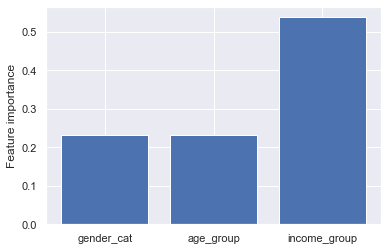

In [9]:
plt.bar(labels, sorted(importances));
plt.ylabel('Feature importance');